**Import Libraries**

In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from keras.models import Model 
from keras.layers import LSTM,Activation, Dense, Dropout, Input, Embedding 
from keras.optimizers import RMSprop 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing import sequence 
from keras.utils import to_categorical 
from keras.callbacks import EarlyStopping
import tensorflow
%matplotlib inline

In [28]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

**Read the Dataset**

In [29]:
pwd

'/content/drive/MyDrive'

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
cd //content/drive/MyDrive/

/content/drive/MyDrive


In [32]:
df= pd.read_csv('/content/drive/MyDrive/spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Pre-processing the Dataset**

In [33]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis= 1,inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

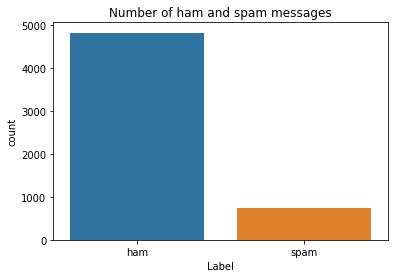

In [34]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [35]:
x= df.v2
y= df.v1
le= LabelEncoder()
y= le.fit_transform(y)
y= y.reshape(-1,1)

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)

In [37]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
sequences = tok.texts_to_sequences(x_train)

**Create Model & Add Layers**

In [38]:
def RNN():
 inputs = Input(name='inputs',shape=[max_len])
 layer = Embedding(max_words,50,input_length=max_len)(inputs)
 layer = LSTM(64)(layer)
 layer = Dense(256,name='FC1')(layer)
 layer = Activation('relu')(layer)
 layer = Dropout(0.5)(layer)
 layer = Dense(1,name='out_layer')(layer)
 layer = Activation('sigmoid')(layer)
 model = Model(inputs=inputs,outputs=layer)
 return model

**Compile the Model**

In [39]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257 

In [40]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [41]:
data=df.rename(
    {
        "v1":"Category",
        "v2":"Message"
    },

    axis=1
)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [43]:
data["Message Length"]=data["Message"].apply(len)

<function matplotlib.pyplot.show(*args, **kw)>

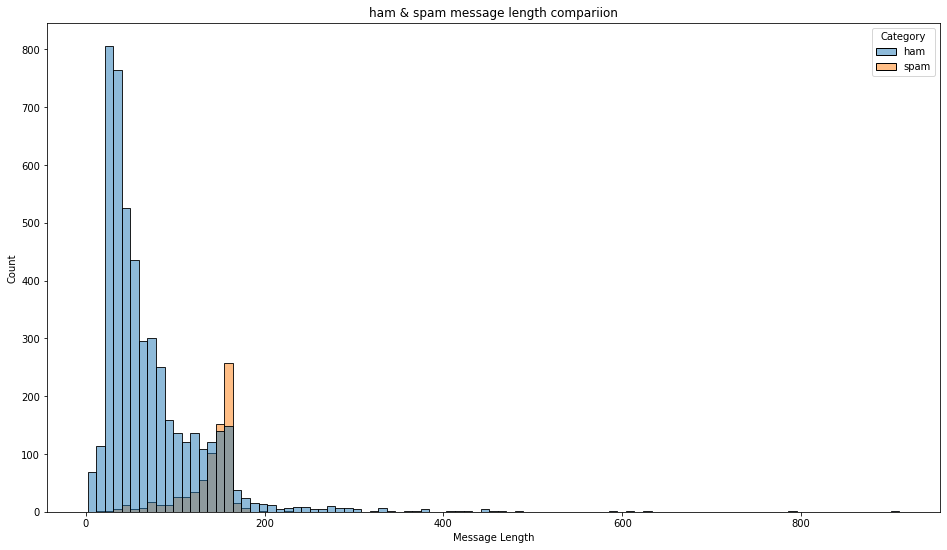

In [44]:
fig=plt.figure(figsize=(16,9))
sns.histplot(
    x=data["Message Length"],
    hue=data["Category"]
)
plt.title("ham & spam message length compariion")
plt.show

In [45]:
ham_desc=data[data["Category"]=="ham"]["Message Length"].describe()
spam_desc=data[data["Category"]=="spam"]["Message Length"].describe()

print("Ham Message Length Description:\n",ham_desc)
print("****************************")
print("spam Message Length Description:\n",spam_desc)

Ham Message Length Description:
 count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: Message Length, dtype: float64
****************************
spam Message Length Description:
 count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: Message Length, dtype: float64


In [46]:
data.describe(include="all")

,Category,Message,Message Length
count,5572,5572,5572.000000
unique,2,5169,NaN
top,ham,"Sorry, I'll call later",NaN
freq,4825,30,NaN
mean,NaN,NaN,80.118808
std,NaN,NaN,59.690841
min,NaN,NaN,2.000000
25%,NaN,NaN,36.000000
50%,NaN,NaN,61.000000
75%,NaN,NaN,121.000000


In [47]:
data["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

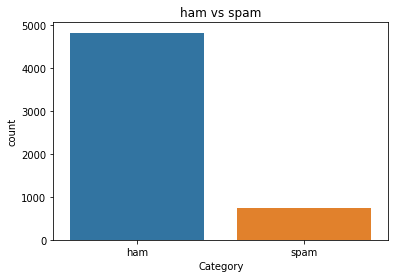

In [48]:
sns.countplot(
    data=data,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [49]:
ham_count=data["Category"].value_counts()[0]
spam_count=data["Category"].value_counts()[1]
total_count=data.shape[0]

print("Ham Contains:{:2f}% of total data.".format(ham_count/total_count*100))
print("Spam Contains:{:2f}% of total data.".format(spam_count/total_count*100))

Ham Contains:86.593683% of total data.
Spam Contains:13.406317% of total data.


In [50]:
minority_len=len(data[data["Category"]=="spam"])
majority_len=len(data[data["Category"]=="ham"])
minority_indices=data[data["Category"]=="spam"].index
majority_indices=data[data["Category"]=="ham"].index
random_majority_indices=np.random.choice(
    majority_indices,
    size=minority_len,
    replace=False
)
undersampled_indices=np.concatenate([minority_indices,random_majority_indices])
df=data.loc[undersampled_indices]
df=df.sample(frac=1)

df=df.reset_index()
df=df.drop(
    columns=["index"],
)

In [51]:
df.shape

(1494, 3)

In [52]:
df["Category"].value_counts()

ham     747
spam    747
Name: Category, dtype: int64

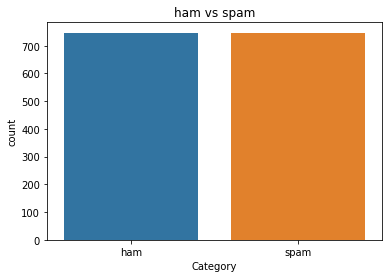

In [53]:
sns.countplot(
    data=df,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [54]:
df.head()

,Category,Message,Message Length
0,ham,Not able to do anything.,24
1,ham,"Good afternoon, babe. How goes that day ? Any ...",105
2,spam,UÛªve Bin Awarded å£50 to Play 4 Instant Cash...,131
3,spam,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,158
4,ham,"(No promises on when though, haven't even gott...",60


In [55]:
df["label"]=df["Category"].map(
    {
        "ham":0,
        "spam":1
    }
)

In [56]:
df.head()

,Category,Message,Message Length,label
0,ham,Not able to do anything.,24,0
1,ham,"Good afternoon, babe. How goes that day ? Any ...",105,0
2,spam,UÛªve Bin Awarded å£50 to Play 4 Instant Cash...,131,1
3,spam,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,158,1
4,ham,"(No promises on when though, haven't even gott...",60,0


In [57]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer=PorterStemmer

In [58]:
corpus=[]
for message in df["Message"]:
  message=re.sub("[^a-zA-Z]","",message)
  message=message.lower()
  message=message.split()

In [59]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size=10000

oneHot_doc=[one_hot(words,n=vocab_size)
for words in corpus
]

In [60]:
df["Message Length"].describe()

count    1494.000000
mean      103.395582
std        56.978282
min         2.000000
25%        48.000000
50%       115.500000
75%       153.000000
max       632.000000
Name: Message Length, dtype: float64

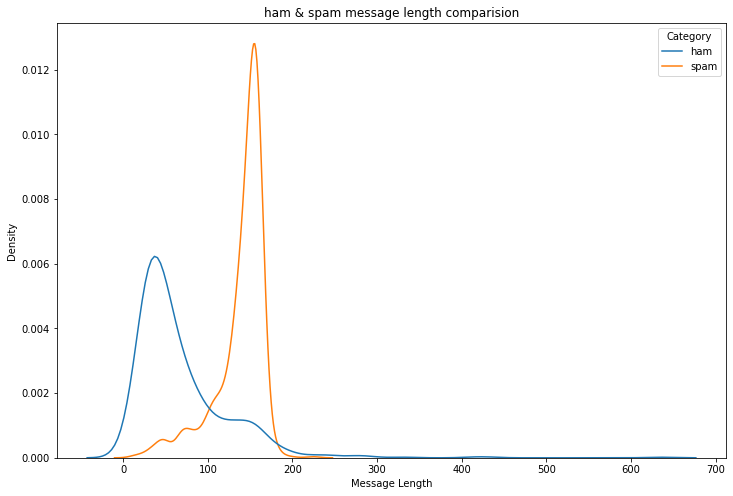

In [61]:
fig=plt.figure(figsize=(12,8))
sns.kdeplot(
    x=df["Message Length"],
    hue=df["Category"]
)
plt.title("ham & spam message length comparision")
plt.show()


In [62]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentence_len=100
embedded_doc=pad_sequences(
    oneHot_doc,
    maxlen=sentence_len,
    padding="pre"
)

In [63]:
extract_features=pd.DataFrame(
    data=embedded_doc
)
target=df["label"]

In [64]:
df_final=pd.concat([extract_features,target],axis=1)

In [65]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [66]:
x=df_final.drop("label",axis=1)
y=df_final["label"]

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_trainval,x_test,y_trainval,y_test=train_test_split(
    x,
    y,
    random_state=37,
    test_size=0.2
)

In [69]:
x_trainval,x_val,y_trainval,y_test=train_test_split(
    x_trainval,
    y_trainval,
    random_state=37,
    test_size=0.2
)

In [70]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_2 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257 